In [1]:
from analysis import *
from utils import *
from pathlib import Path


params = [
    (1, 20),
    (2, 40),
    (3, 20),
    (4, 15),
    (5, 15),
    (6, 10)
]




# Slopes 

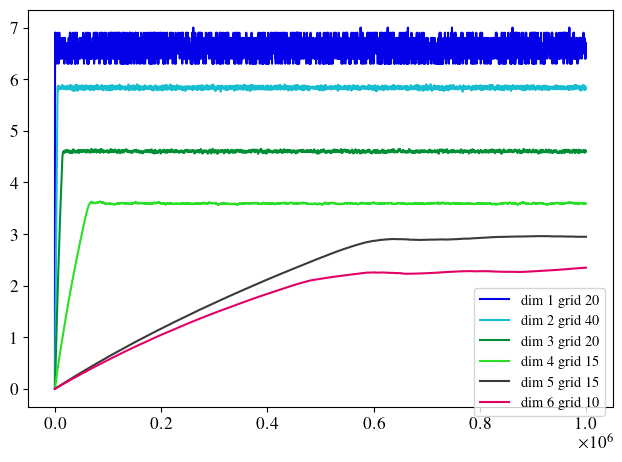

In [2]:
fig, ax = plt.subplots()

for dim, grid in params:
    path_dir = Path(f"data/d{dim}_g{grid}_c7_cl_nco/data_0.slopes.npy")
    step, slope = load_slope_values(path_dir.__str__())

    draw_slope(slope, step, ax=ax, label=f"dim {dim} grid {grid}")

fig.legend(fontsize="small", loc="lower right", bbox_to_anchor=(0.97, 0.1))


# Calculate the scaling exponents

## Visual assessment

In [3]:
from sandpile import generate_3d_distribution_from_data_sample
dim, grid = 2, 40
path_dir = Path(f"data/d{dim}_g{grid}_c7_cl_nco")
if not path_dir.joinpath("distribution.npz").exists():
    print("Generating distribution")
    generate_3d_distribution_from_data_sample(path_dir)
else:
    print("Distribution already exists")

(s, t, r), bins = load_3d_dist(path_dir)

Distribution already exists


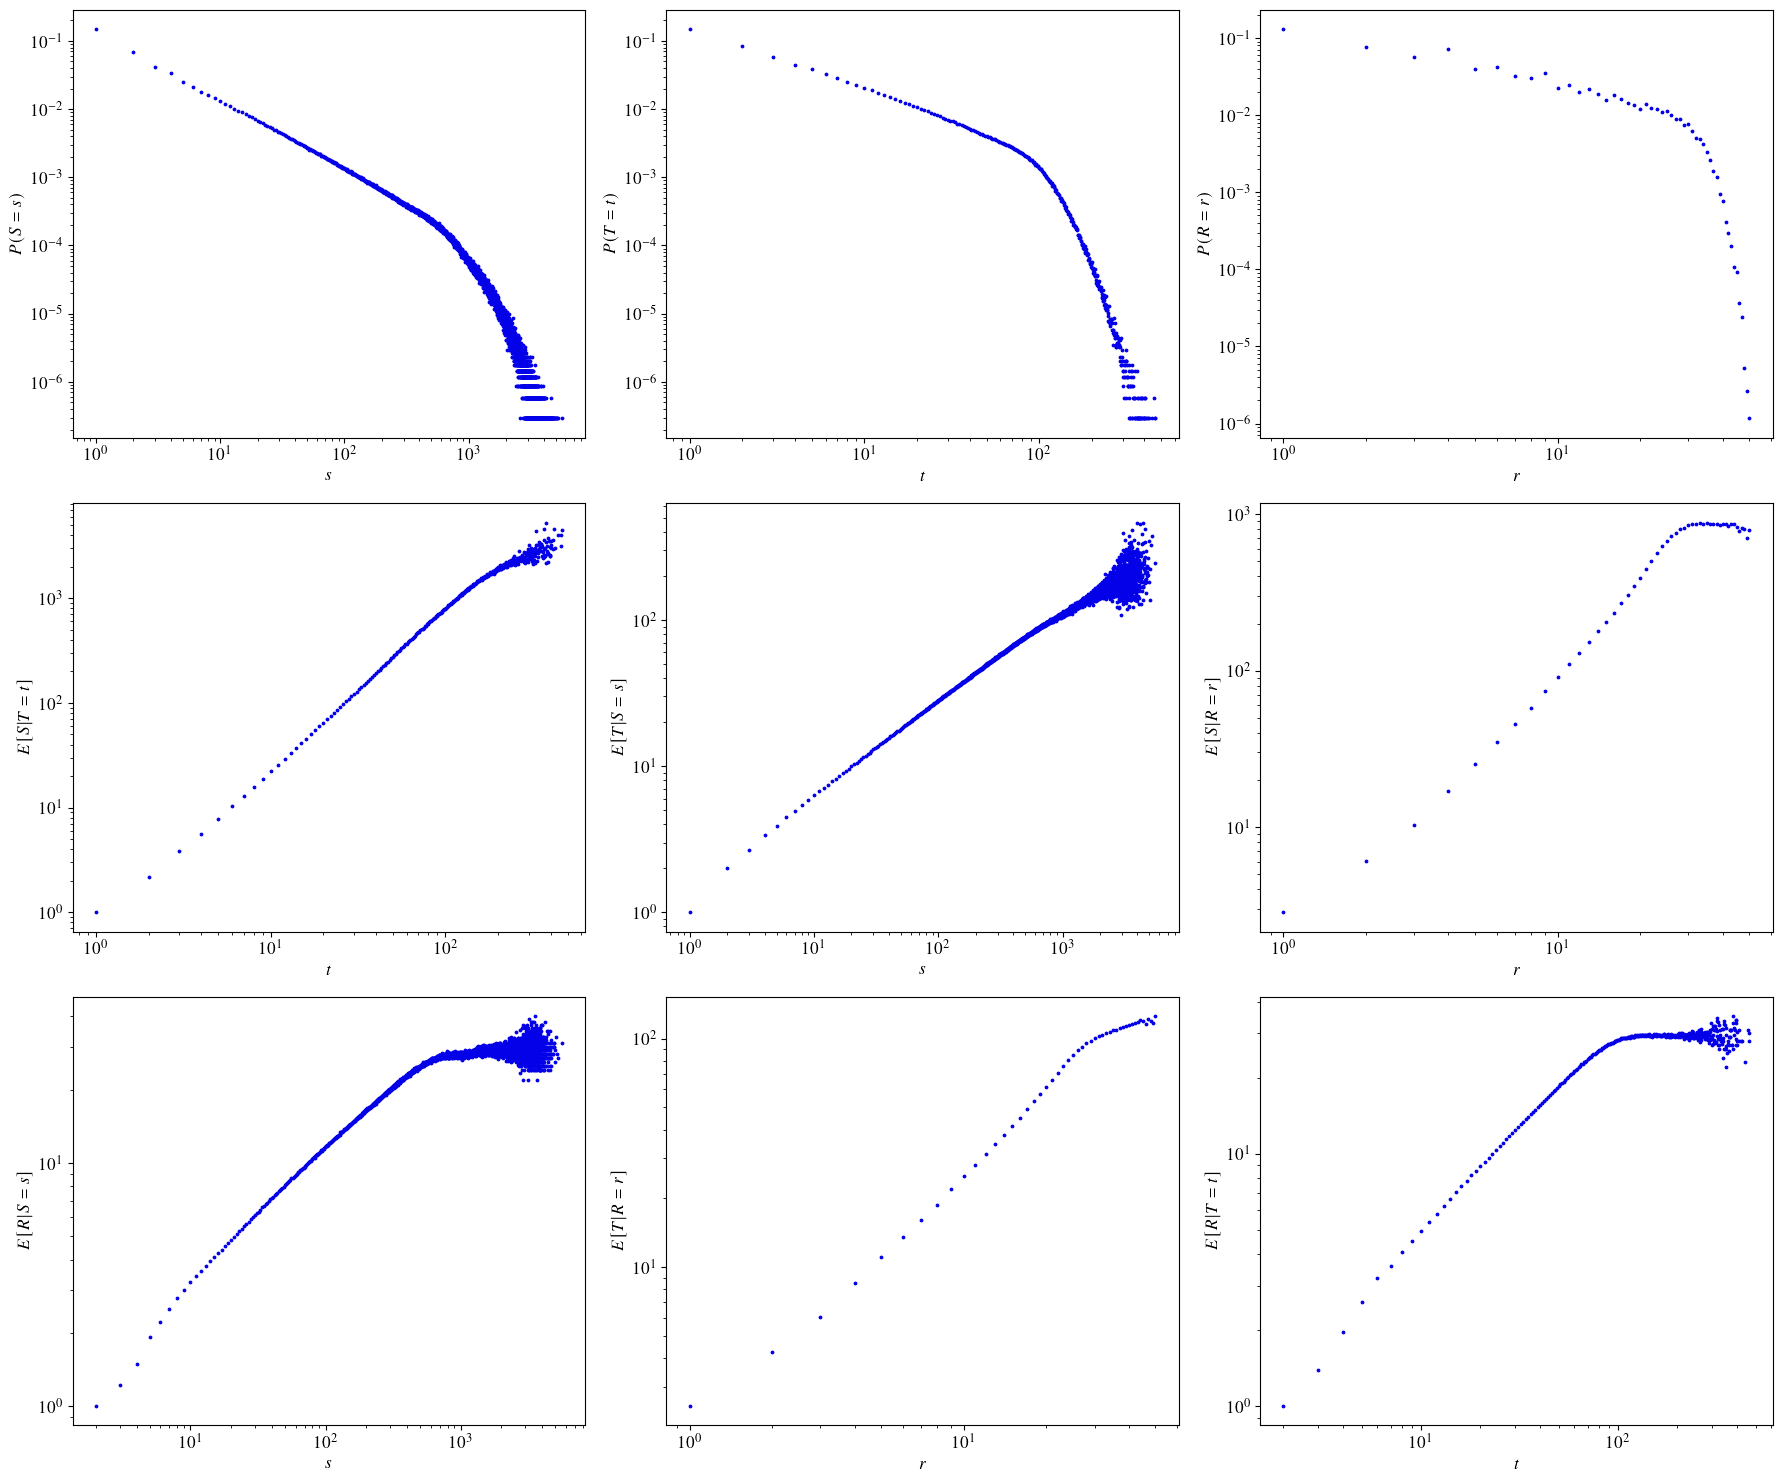

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
plot_scaling_exponents(s, t, r, bins, axs)
plt.tight_layout()
plt.show()

## Generating the table

In [ ]:
params = [
    (2, 40),
    (3, 20),
    (4, 12),
    (5, 10),
    # (6, 10)
]

limits = [
    [
        (None, 100), (None, 20), (0.1, 4),
        (None, 90), (3, 100), (0.2, 9),
        (1, 80), (0.2, 8), (3, 30)
    ],
    [
        (None, 100), (None, 40), (1, 8),
        (None, 90), (7, 120), (3, 10.5),
        (10.5, 150), (3, 10.5), (3, 80)
    ],
    [
        (None, 100), (None, 20), (1, 4.5),
        (None, 90), (7, 120), (0.2, 6),
        (6, 70), (1, 15), (3, 30)
    ],
    [
        (None, 80), (None, 20), (0.1, 7),
        (None, 90), (3, 100), (0.2, 6),
        (1, 80), (0.2, 5), (1, 20)
    ],
    # [
    #     (None, 100), (None, 20), (1, 4.5),
    #     (None, 90), (3, 100), (0.2, 6),
    #     (5, 50), (0.2, 5), (3, 30)
    # ]
]

df = pd.DataFrame()

for _limits, (_dim, _grid) in zip(limits, params):
    path_dir = Path(f"data/d{_dim}_g{_grid}_c7_cl_nco")
    data = load_combine_avalanche_data_samples(path_dir, False)
    curr_df, _ = calculate_all_scaling_exponents(data, _limits)
    df = pd.concat([df, curr_df]).reset_index(drop=True)

df.map(lambda x: "{:.1uSP}".format(x))
